In [9]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('ggplot')
%matplotlib inline
import pandas as pd
import numpy as np

In [103]:
results_edited_filename = "out_mix_stbl.csv"
results_null_filename = "out_null.csv"

df = pd.read_csv(results_edited_filename)
df.loc[:, 'title'] = df.iloc[:,0].str.extract(r"/([A-Za-z \(\)]+) mix.txt")

df0 = pd.read_csv(results_null_filename)
df0.loc[:, 'title'] = df0.iloc[:,0].str.extract(r"/([A-Za-z \(\)]+).txt")
# df.columns = ['file', 'length', 'edit rate', 'HC', 'pvalue', 'precision', 'recall']
df_disp = df.merge(df0, on = 'title', suffixes=["", " (null)"], how='inner').filter(
    ['title', 'length', 'edit_rate','HC', 'HC_pvalue', 'HC (null)', 'HC_pvalue (null)']).dropna()


df_disp.loc[:,'length'] = df_disp['length'].astype(int)
aa = df_disp[~df_disp.title.isin(['Michael Jordan', 'Jerusalem', 'Airpods'])].set_index('title')
aa.loc[:,'length'] = aa['length'].astype(int)

print(aa)

print(aa.to_latex())

Empty DataFrame
Columns: [length, edit_rate, HC, HC_pvalue, HC (null), HC_pvalue (null)]
Index: []
\begin{tabular}{lrrrrrr}
\toprule
 & length & edit_rate & HC & HC_pvalue & HC (null) & HC_pvalue (null) \\
title &  &  &  &  &  &  \\
\midrule
\bottomrule
\end{tabular}



In [ ]:
df['HC (non-edited)'] = df0['HC']
df['HC_pvalues (non-edited)'] = df0['HC_pvalue']
df.iloc[:, 0] = df.iloc[:, 0].str.extract(r"/([A-Za-z \(\)]+) mix")

df['length'] = df['length'].astype(int)
df = df.round(5)
df


## Sentences in a single article

mean =  3.082252525252525


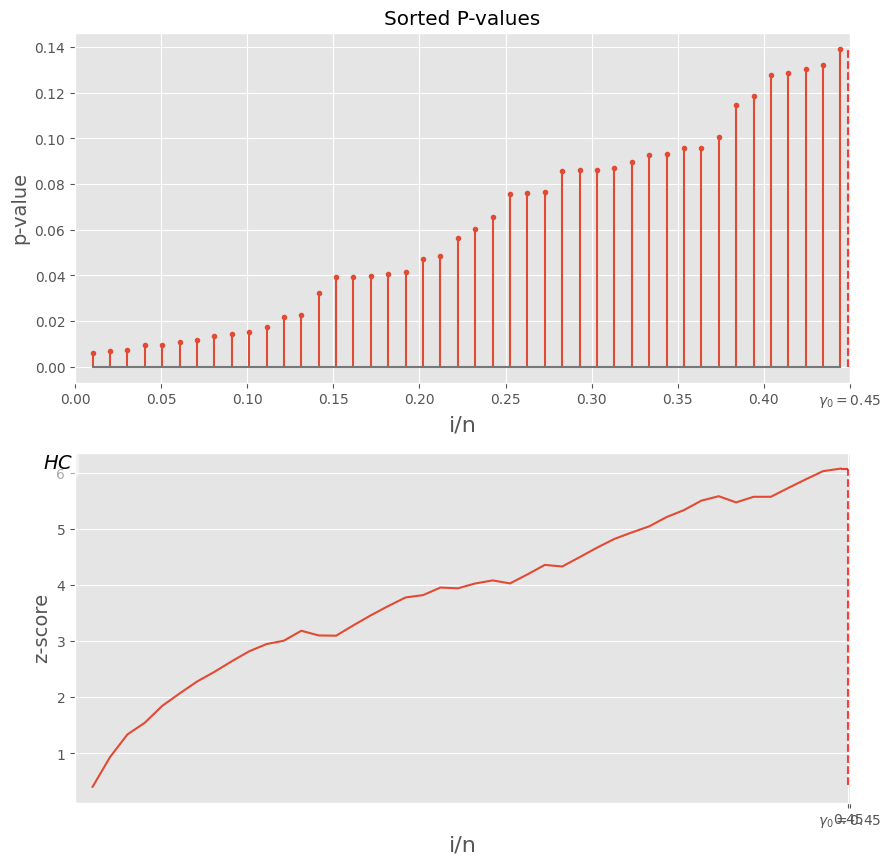

(6.079411072896526, 0.1393)


,Unnamed: 0,sentence,response,pvalue,context,comment,mask,tag,len
30,30,Initiatives aimed at fostering innovation and...,3.975,0.0061,NaN,OK,True,no edits,26
72,72,Best Places to Work and Income:...,3.644,0.0070,NaN,OK,True,no edits,23
70,70,Other Large Companies: Beyond these highlighte...,3.678,0.0072,NaN,OK,True,no edits,23
38,38,The downtown area is marked by...,4.070,0.0097,NaN,OK,True,no edits,19
14,14,The availability of these resources led...,3.456,0.0097,NaN,OK,True,no edits,23
58,58,"The industry, once the cornerstone of...",4.310,0.0108,NaN,OK,True,no edits,17
95,95,"Certainly, let's explore the governmental aspe...",4.377,0.0117,NaN,OK,True,no edits,18
52,52,The data also underscored a range...,3.454,0.0133,NaN,OK,True,no edits,27
18,18,The city's early success in iron...,3.435,0.0142,NaN,OK,True,no edits,30
79,79,"These companies, such as UAB Health...",3.595,0.0152,NaN,OK,True,no edits,29


In [10]:
file_name = "Birmingham_sentences.csv"

MIN_LEN = 6
df_doc1 = pd.read_csv(file_name)
df_doc1['len'] = df_doc1.sentence.apply(lambda x : len(x.split()))
df_doc1 = df_doc1[df_doc1.len > MIN_LEN]

df_disp = df_doc1
df_disp.loc[:, 'response'] = df_disp['response'].apply(lambda x : np.round(x,3))
df_disp.loc[:, 'pvalue'] = df_disp['pvalue'].apply(lambda x : np.round(x,4))
df_disp.loc[df_disp.tag == '<edit>', 'sentence'] = '\\textcolor{blue}' + df_disp.loc[df_disp.tag == '<edit>', 'sentence']

df_disp['sentence'] = df_disp['sentence'].apply(lambda x : " ".join(x.split()[:6]) + "...")


a = df_disp.filter(['sentence', 'response', 'pvalue'])
b = df_disp[df_disp['mask']].filter(['sentence', 'pvalue']).sort_values('pvalue')

print("mean = ", df_disp.response.mean())

from multitest import MultiTest
pvals = df_disp['pvalue']
mt = MultiTest(pvals[~np.isnan(pvals)], stbl=True)
mt.hc_dashboard(gamma=0.45)
print(mt.hc(gamma=0.45))

df_disp.sort_values('pvalue').head(40)

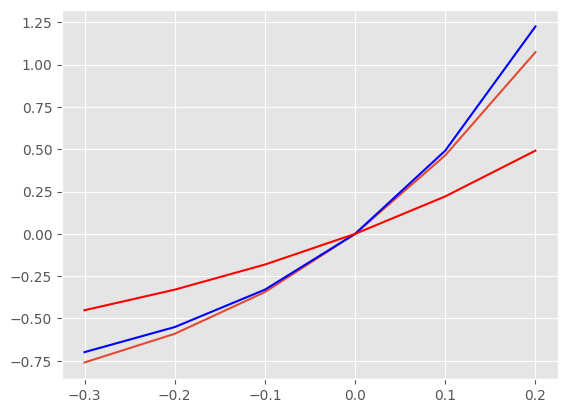

In [22]:
aa = np.arange(-.3,.3, 0.1)
m = 4
f = (1 + aa) ** m - 1
plt.plot(aa, f)
plt.plot(aa, np.exp(m*aa) - 1, color='blue')
plt.plot(aa, np.exp(m*aa/2) - 1, color='red')

In [215]:
print("General")
n_head = 9
n_tail = 3
df_sent = pd.concat([a.head(n_head), a.tail(n_tail)])
df_sent['sentence'] = df_sent['sentence'].apply(lambda x : " ".join(x.split()[:5]) + "...")
print(df_sent.to_latex(index=False))

General
\begin{tabular}{lrr}
\toprule
sentence & response & pvalue \\
\midrule
The Welsh Corgi, often simply... & 2.765000 & 0.212000 \\
Renowned for their distinctive appearance,... & 2.864000 & 0.242400 \\
\textcolor{blue}Originally bred to herd cattle,... & 2.484000 & 0.649000 \\
This article delves into the... & 3.005000 & 0.490400 \\
From their origin as indispensable... & 3.682000 & 0.041700 \\
Moreover, we examine the different... & 3.400000 & 0.116700 \\
Join us on this journey... & 2.460000 & 0.309300 \\
The history of the Corgi... & 2.565000 & 0.539500 \\
\textcolor{blue}Corgi breeds are classified as... & 2.266000 & 0.818700 \\
Overall, Welsh Corgis have become... & 2.456000 & 0.459400 \\
\textcolor{blue}They have surpassed their humble... & 3.906000 & 0.105700 \\
Their unique combination of historical... & 3.284000 & 0.077900 \\
\bottomrule
\end{tabular}



In [220]:
print("HCT")
n_head = 9
n_tail = 7
df_HCT = pd.concat([b.head(n_head), b.tail(n_tail)])
print(df_HCT.to_latex(index=False))

HCT
\begin{tabular}{lr}
\toprule
sentence & pvalue \\
\midrule
Despite their herding heritage gradually diminishing,... & 0.011300 \\
Corgi-themed fundraisers and charity events have... & 0.021100 \\
Legend has it that the fairies... & 0.034600 \\
\textcolor{blue}It is believed that the Cardigan... & 0.040000 \\
From their origin as indispensable herding... & 0.041700 \\
Cardigan Corgis were also adept herding... & 0.043500 \\
Their unique combination of historical significance,... & 0.077900 \\
\textcolor{blue}They have appeared in several animated... & 0.082000 \\
\textcolor{blue}They have surpassed their humble origins... & 0.105700 \\
They excelled at driving cattle and... & 0.177000 \\
Today, Welsh Corgis, especially the Pembroke,... & 0.185100 \\
Mascots and Symbols: In some regions,... & 0.188300 \\
Here are some ways in which... & 0.194200 \\
\textcolor{blue}The breeds are named for the... & 0.206500 \\
\textcolor{blue}A Welsh Corgi appeared with Queen... & 0.211400 \\
The Wels

In [228]:
14 + 81

95

General
\begin{tabular}{lrrl}
\toprule
sentence & response & pvalue & tag \\
\midrule
The Welsh Corgi, often simply... & 2.764900 & 0.212000 & not edit \\
Renowned for their distinctive appearance,... & 2.864000 & 0.242400 & not edit \\
Originally bred to herd cattle,... & 2.484400 & 0.649000 & <edit> \\
This article delves into the... & 3.004800 & 0.490400 & not edit \\
From their origin as indispensable... & 3.682400 & 0.041700 & not edit \\
Moreover, we examine the different... & 3.399900 & 0.116700 & not edit \\
Join us on this journey... & 2.459500 & 0.309300 & not edit \\
The history of the Corgi... & 2.564700 & 0.539500 & not edit \\
Corgi breeds are classified as... & 2.265500 & 0.818700 & <edit> \\
Corgi-themed fundraisers and charity events... & 3.635700 & 0.021100 & not edit \\
Overall, Welsh Corgis have become... & 2.456000 & 0.459400 & not edit \\
They have surpassed their humble... & 3.906100 & 0.105700 & <edit> \\
Their unique combination of historical... & 3.284100 & 0.

In [117]:
print(b.to_latex())

\begin{tabular}{llrr}
\toprule
 & sentence & response & pvalue \\
\midrule
0 & July 18 2023. & 4.780900 & NaN \\
1 & Welsh Corgi.

Introduction.
 & 4.839000 & NaN \\
2 & The Welsh Corgi, often simply referred to as Corgi, is a charming and beloved breed of herding dog with roots deeply entwined in the landscapes and folklore of Wales.
 & 2.764900 & 0.212000 \\
3 & Renowned for their distinctive appearance, characterized by their short legs and elongated bodies, Welsh Corgis have captured the hearts of dog enthusiasts worldwide.
 & 2.864000 & 0.242400 \\
4 & Originally bred to herd cattle, sheep, and horses, Corgis are celebrated for their intelligence, agility, unwavering loyalty, and eagerness to please. & 2.484400 & 0.649000 \\
5 & This article delves into the fascinating history, characteristics, and unique attributes of the Welsh Corgi breed.
 & 3.004800 & 0.490400 \\
6 & From their origin as indispensable herding aides in the verdant fields of Wales to their prominence as cherishe

In [107]:
a['response'] = a['response'].round(2)
a['pvalue'] = a['pvalue'].round(4)
print(a.head(6).to_latex(decimal=4))

TypeError: replace() argument 2 must be str, not int

In [108]:
? a.to_latex

Signature:
 a.to_latex(
    buf: 'FilePath | WriteBuffer[str] | None' = None,
    columns: 'Sequence[Hashable] | None' = None,
    header: 'bool_t | Sequence[str]' = True,
    index: 'bool_t' = True,
    na_rep: 'str' = 'NaN',
    formatters: 'FormattersType | None' = None,
    float_format: 'FloatFormatType | None' = None,
    sparsify: 'bool_t | None' = None,
    index_names: 'bool_t' = True,
    bold_rows: 'bool_t' = False,
    column_format: 'str | None' = None,
    longtable: 'bool_t | None' = None,
    escape: 'bool_t | None' = None,
    encoding: 'str | None' = None,
    decimal: 'str' = '.',
    multicolumn: 'bool_t | None' = None,
    multicolumn_format: 'str | None' = None,
    multirow: 'bool_t | None' = None,
    caption: 'str | tuple[str, str] | None' = None,
    label: 'str | None' = None,
    position: 'str | None' = None,
) -> 'str | None'
Docstring:
Render object to a LaTeX tabular, longtable, or nested table.

Requires ``\usepackage{{booktabs}}``.  The output can be c

In [51]:
df_doc0 = df_disp

In [52]:
pval0 = df_doc0.sort_values('pvalue').pvalue.dropna().values
pval1 = df_doc1.sort_values('pvalue').pvalue.dropna().values

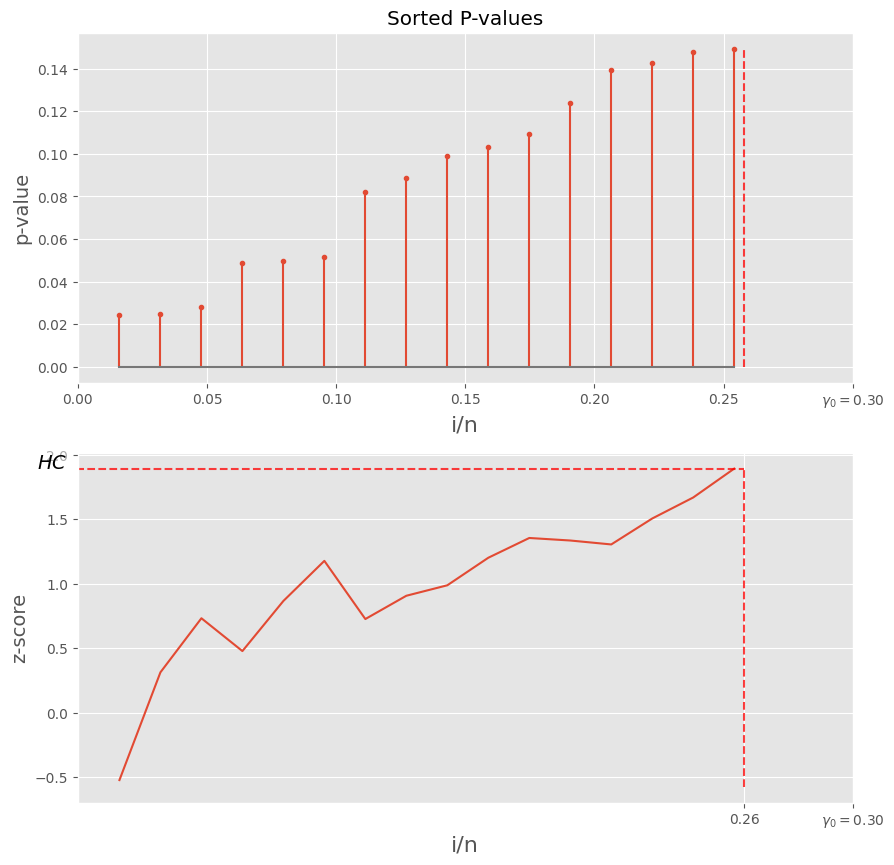

(1.8936251543151155, 0.1494)


In [55]:
from multitest import MultiTest
pvals = pval0
mt = MultiTest(pvals[~np.isnan(pvals)])
mt.hc_dashboard(gamma=0.25)
print(mt.hc(gamma=.25))


In [65]:
G = 47
from text_detect import get_survival_function

#no-context-null-data-file: "results/gpt2-xl_no_context_wiki-long_machine.csv"
#no-context-null-data-file: "results/gpt2-xl_no_context_news-long_machine.csv"
#no-context-null-data-file: "results/gpt2-xl_no_context_abstracts_machine.csv"

df_null = pd.read_csv("results/gpt2-xl_no_context_files_machine.csv")
pval_functions = get_survival_function(df_null[df_null.num > 1], G=G)

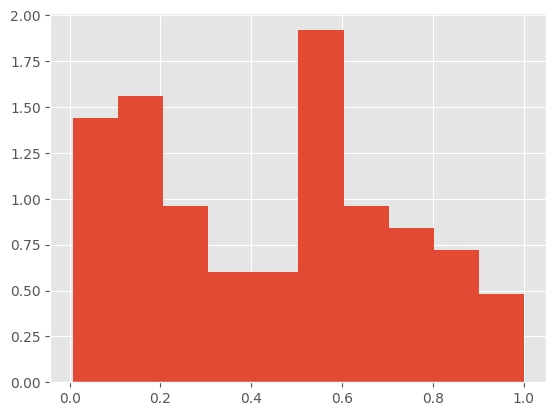

In [68]:
df_doc1['len'] = df_doc1.sentence.apply(lambda x : len(x.split()))
min_len = 10
new_pvals = np.array([pval_functions(l, r)[0][0] for l,r in zip(df_doc1['len'], df_doc1['response']) if l >= min_len ])
plt.hist(new_pvals, density=True); plt.show()

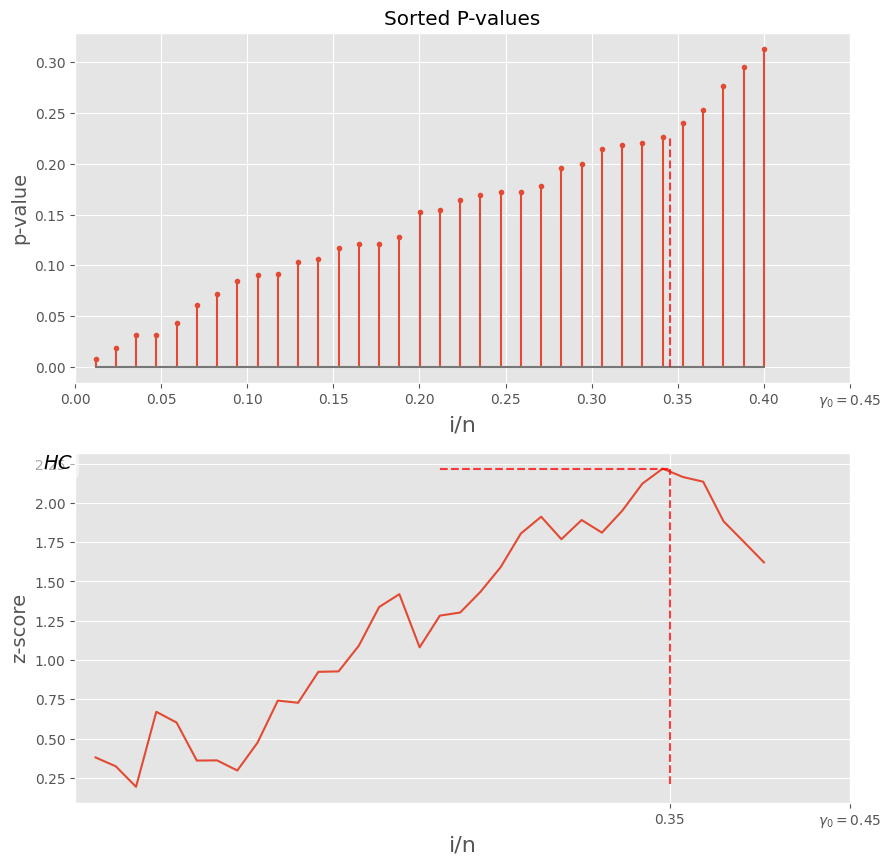

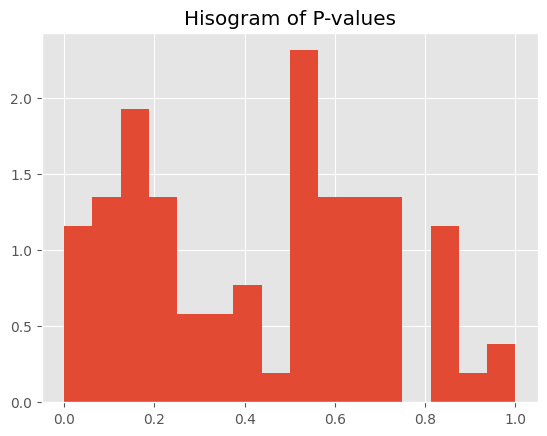

In [70]:
from multitest import MultiTest
pvals = new_pvals
mt = MultiTest(pvals[~np.isnan(pvals)])
mt.hc_dashboard(gamma=0.4)
df_doc1['pvalue'].hist(bins=np.linspace(0,1,17), density=True)
plt.title("Hisogram of P-values")
plt.savefig("pvalue_hist.png")
plt.show()

In [146]:
# load perplexity detector
from src.PerplexityEvaluator import PerplexityEvaluator
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

lm_name = 'gpt2-xl'
tokenizer = AutoTokenizer.from_pretrained(lm_name)
model = AutoModelForCausalLM.from_pretrained(lm_name)

device = 'mps' if torch.backends.mps.is_available() else 'cpu'
model.to(device)

sentence_detector = PerplexityEvaluator(model, tokenizer)

In [147]:
from text_detect import get_survival_function
import yaml

conf_file = "conf.yml"
with open(conf_file, "r") as stream:
    try:
        params = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)

null_data_file = params['no-context-null-data-file']
lm_name = params['language-model-name']

df_null = pd.read_csv(null_data_file)

max_tokens_per_sentence = params['max-tokens-per-sentence']
min_tokens_per_sentence = params['min-tokens-per-sentence']

if params['ignore-first-sentence']:
    df_null = df_null[df_null.num > 1]

pval_functions = get_survival_function(df_null, G=params['number-of-interpolation-points'])

In [172]:
df_doc[df_doc.tag == '<edit>']

,Unnamed: 0,sentence,response,pvalue,context,comment,mask,tag,len
4,4,He first began work in the Cubist style initia...,4.109973,0.121012,NaN,OK,False,<edit>,12
8,8,He also repeatedly used egg imagery to symboli...,5.231079,0.037021,NaN,OK,True,<edit>,12
14,14,"He sported a thin Menjou-style mustache, which...",4.538991,0.017729,NaN,OK,True,<edit>,15
22,22,"When Dali turned five, his parents told him th...",3.356762,0.053151,NaN,OK,True,<edit>,26
38,38,He developed a close relationship with the poe...,3.977205,0.006429,NaN,OK,True,<edit>,28
40,40,His work was highly influenced by the work of ...,2.516168,0.608668,NaN,OK,False,<edit>,23
53,53,He met his wife Gala in 1929 and married her i...,2.822442,0.631948,NaN,OK,False,<edit>,16
71,71,Gala continued to serve as an important muse f...,4.022166,0.169930,NaN,OK,False,<edit>,11
76,76,He collaborated with Walt Disney on a film cal...,3.260392,0.268181,NaN,OK,False,<edit>,15
94,94,The French writer Andre Breton denounced Dali ...,3.971388,0.109542,NaN,OK,False,<edit>,16


In [173]:
df_doc.loc[185, :]

Unnamed: 0                                                  185
sentence      Among his most famous designs is the "Mae West...
response                                               3.826988
pvalue                                                 0.066668
context                                                     NaN
comment                                                      OK
mask                                                      False
tag                                                      <edit>
len                                                          44
Name: 185, dtype: object

In [155]:
sent

'When Dali turned five, his parents told him that he was a reincarnation of his sibling, which haunted his life and art until his dying day.'

In [194]:
sent1 = 'When Dali turned five, his parents told him that he was a reincarnation of his sibling, which haunted his life and affected his art until his dying day.'

sent1 = "The French writer Andre Breton, one of the leaders of the surrealist group, in a public letter denounced Dali as a fascist and supporter of Franco and Hilter."
r = sentence_detector(sent1)
r

array(3.1144648, dtype=float32)

In [195]:
l = len(sent1.split())
pval_functions(l, r)

array([[0.06251215]])

In [5]:
df0 =
hc95 = df0['hc'].quantile(0.95)
hc975 = df0['hc'].quantile(0.975)
fisher005 = df0['fisher_pval'].quantile(0.05)
fisher0025 = df0['fisher_pval'].quantile(0.025)

print("HC95 = ", hc95)
print("HC975 = ", hc975)
print("fisher_pval005 = ", fisher005)
print("fisher_pval0025 = ", fisher0025)


NameError: name 'df0' is not defined

In [92]:
print("HC discoveries: ", np.mean(df.hc > hc95))
print("Fisher discoveries: ", np.mean(df.fisher_pval < fisher005))
print("Combined: ", np.mean( (df.hc > hc975) | (df.fisher_pval < fisher0025) ))
print("FD rate: ", np.mean(df.FDP))
print("TD rate: ", np.mean(df.TDP))


HC null discoveries:  0.05102040816326531
Fisher null discoveries:  0.0
HC discoveries:  0.9796954314720813
Fisher discoveries:  0.4365482233502538
Combined:  0.9847715736040609
FD rate:  0.3344527811119749
TD rate:  0.6545723850869264


0.030153015301530153